### Importing Python Functions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
import random
%matplotlib inline

from numpy import median

### Importing Dataset

In [ ]:
salaries = pd.read_csv('/content/Salaries.csv')
batting = pd.read_csv('/content/Batting.csv')
fielding = pd.read_csv('/content/Fielding.csv')
names= pd.read_csv('/content/People.csv')

### Cleansing and merging data

In [ ]:
#combining batting fielding and salaries
batting_sal = pd.merge(batting,salaries,on=['playerID','yearID'],how='inner')
batting_field_sal = pd.merge(batting_sal,fielding,on=['playerID','yearID'],how='inner')
batting_field_sal1 = pd.merge(batting_field_sal,names,on=['playerID'],how='inner')
#getting rid of players that are pitchers
batting_field_sal1=batting_field_sal1[-batting_field_sal1['POS'].isin(['P'])].reset_index().drop(columns='index')
batting_field_sal1


#getting rid of players that have no salary
batting_field_sal1 = batting_field_sal1[(batting_field_sal1['salary'].isnull() == False)]
batting_field_sal1.reset_index(inplace=True)
batting_field_sal1.drop('index',axis=1)

,playerID,yearID,stint_x,teamID_x,lgID_x,G_x,AB,R,H,2B,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,Aguayo,Luis,173.0,69.0,R,R,1980-04-19,1989-09-30,agual001,aguaylu01
1,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,Aguayo,Luis,173.0,69.0,R,R,1980-04-19,1989-09-30,agual001,aguaylu01
2,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,Aguayo,Luis,173.0,69.0,R,R,1980-04-19,1989-09-30,agual001,aguaylu01
3,aguaylu01,1986,1,PHI,NL,62,133,17,28,6,...,Aguayo,Luis,173.0,69.0,R,R,1980-04-19,1989-09-30,agual001,aguaylu01
4,aguaylu01,1986,1,PHI,NL,62,133,17,28,6,...,Aguayo,Luis,173.0,69.0,R,R,1980-04-19,1989-09-30,agual001,aguaylu01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28555,whitety01,2016,1,HOU,AL,86,249,24,54,16,...,White,Brian Tyler,238.0,71.0,R,R,2016-04-05,2019-08-11,whitt002,whitety01
28556,willima07,2016,1,NYA,AL,12,27,4,8,1,...,Williams,Mason Jordan,195.0,73.0,L,R,2015-06-12,2021-06-19,willm007,willima10
28557,wolteto01,2016,1,COL,NL,71,205,27,53,15,...,Wolters,Anthony John,195.0,70.0,L,R,2016-04-05,2021-05-15,woltt001,wolteto01
28558,wolteto01,2016,1,COL,NL,71,205,27,53,15,...,Wolters,Anthony John,195.0,70.0,L,R,2016-04-05,2021-05-15,woltt001,wolteto01


In [ ]:
batting_field_sal1['1B'] = (batting_field_sal1['H']-((batting_field_sal1['2B'])+(batting_field_sal1['3B'])+(batting_field_sal1['HR'])))

#batting average - how many hits a player has per at-bat
batting_field_sal1['AVG'] = ((batting_field_sal1['H'].apply(float))/(batting_field_sal1['AB'].apply(float)))

#on-base percentage- how often a player reaches base [hits]+[walks]+[hit by pitch]/[at-bats]+[walks]+[hit by pitch]+[sacrifice flies]
batting_field_sal1['OBP'] = (((batting_field_sal1['H'].apply(float))+(batting_field_sal1['BB'])+(batting_field_sal1['HBP'])))/((batting_field_sal1['AB'].apply(float))+(batting_field_sal1['SF'])+(batting_field_sal1['BB'])+(batting_field_sal1['HBP']))

#slugging- total bases/at-bats: [Singles] + [Doubles] + [Triples x 2] + [Home Runs x 3])/At Bats
batting_field_sal1['SLG'] = ((batting_field_sal1['1B'])+(batting_field_sal1['2B']*2)+(batting_field_sal1['3B']*3)
                  +(batting_field_sal1['HR']*4))/(batting_field_sal1['AB'].apply(float))

#OPS - on base plus slugging
batting_field_sal1['OPS'] = batting_field_sal1['OBP']+batting_field_sal1['SLG']

Since the data set only uses hits and the type of hits they are I added batting average, on base percentage, slugging, and on base percentage.  I have played baseball my whole life so the data in the datasets I have gives me all the information I need to calcualte all those statistics.  Instead of having to type it all out I found a project that already had it all typed out so I used the code and then adjusted it as needed.

In [ ]:
batting_field_sal1[batting_field_sal1['AVG'].isnull()]
bfs = batting_field_sal1.dropna(subset=['AVG'])
bfs = batting_field_sal1[batting_field_sal1['AB']>124]

Cleansing the data so people that don't have any hits are not in the dataset and setting the at bats to be 125 or more to filter out players that have had a decent amount of at bats

In [ ]:
bfs1 = bfs[bfs['GS']>74]

Making Games started 75 or above

In [ ]:
bfs1.to_csv('Econfinal.csv', index = False)

### Heat Map

<ipython-input-8-8143f864b2aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bfs1.corr(),annot=True,linewidth=0.5)


<Axes: >

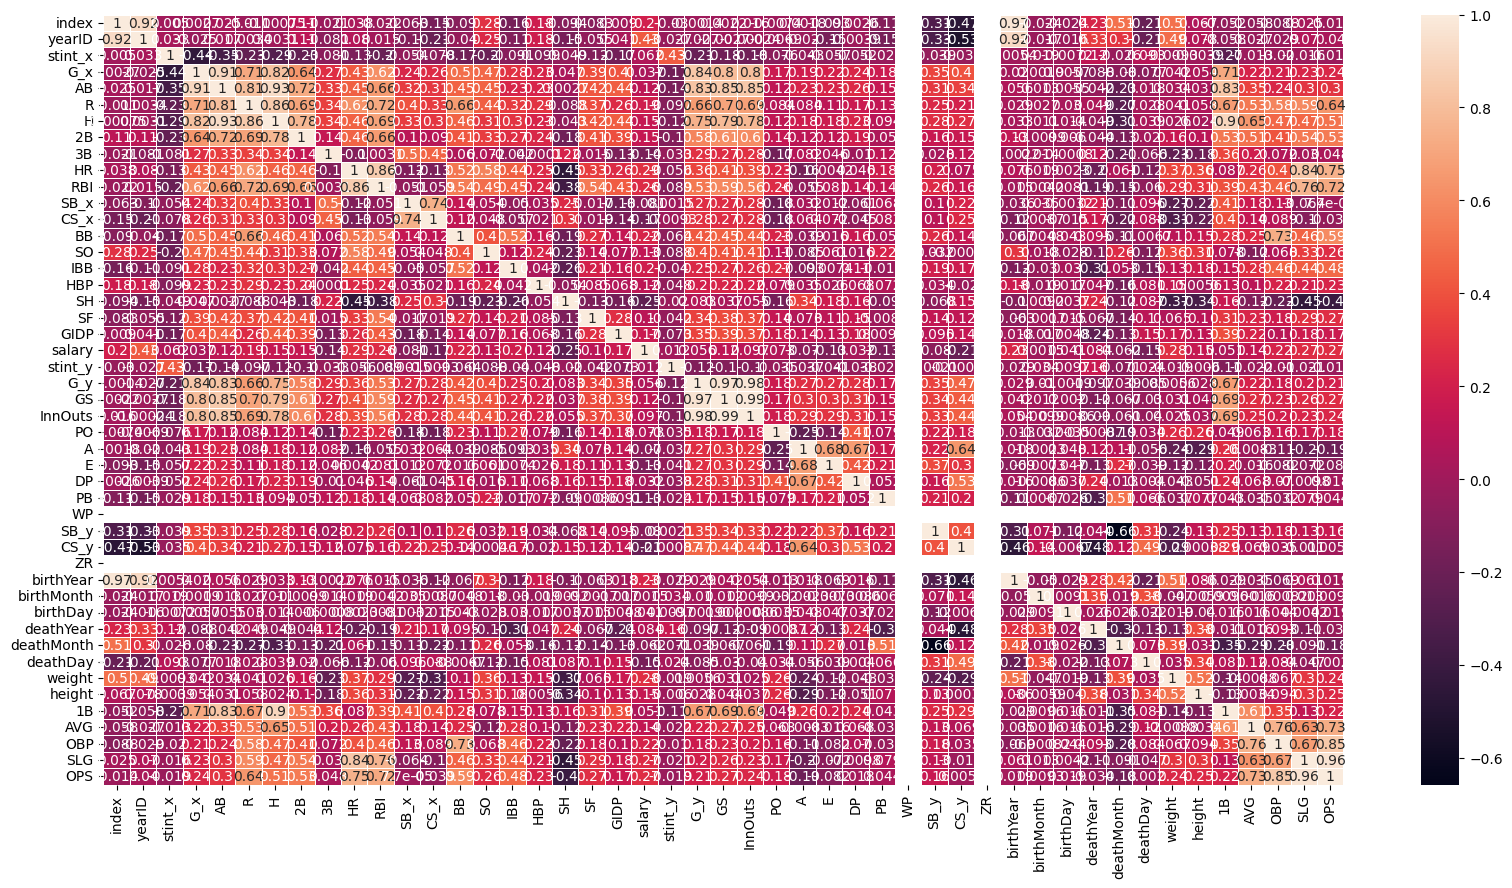

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(bfs1.corr(),annot=True,linewidth=0.5)

### Liner Regression

In [ ]:
baseball_train, baseball_test = train_test_split(bfs1, test_size = .80, random_state = 7)

In [ ]:
X= pd.DataFrame(baseball_train[['R', 'H', 'OBP', 'OPS', 'SLG', 'AVG', 'BB', 'SO']])
y = pd.DataFrame(baseball_train['HR'])
X = sm.add_constant(X)

In [ ]:
model01 = sm.OLS(y,X).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2191.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:31:53   Log-Likelihood:                -3241.1
No. Observations:                1289   AIC:                             6498.
Df Residuals:                    1281   BIC:                             6539.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4291      1.142      1.252      0.211      -0.811       3.669
R            3.41e-05      0.009      0.004      0.997      -0.018       0.018
H              0.0883      0.007     12.134      0.000       0.074       0.103
OBP          -82.0311      7.206    -11.383      0.000     -96.169     -67.893
OPS           33.0946      3.619      9.143      0.000      25.994      40.195
SLG          115.1256      3.829     30.068      0.000     107.614     122.637
AVG         -181.1043     12.787    -14.163      0.000    -206.190    -156.018
BB             0.0677      0.013      5.172      0.000       0.042       0.093
SO             0.0132      0.004      3.664      0.000       0.006       0.020
==============================================================================
Omnibus:                       29.698   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.759
Skew:                           0.165   Prob(JB):                     5.76e-12
Kurtosis:                       3.925   Cond. No.                     1.40e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
Xt= pd.DataFrame(baseball_test[['R', 'H', 'OBP', 'OPS', 'SLG', 'AVG', 'BB', 'SO']])
yt = pd.DataFrame(baseball_test[['HR']])
Xt=sm.add_constant(Xt)

In [ ]:
model01_test = sm.OLS(yt,Xt).fit()
model01_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     8166.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:32:59   Log-Likelihood:                -12984.
No. Observations:                5159   AIC:                         2.598e+04
Df Residuals:                    5151   BIC:                         2.604e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0717      0.563      1.902      0.057      -0.033       2.176
R             -0.0089      0.005     -1.968      0.049      -0.018   -3.29e-05
H              0.0765      0.004     20.851      0.000       0.069       0.084
OBP          -92.9614      3.615    -25.717      0.000    -100.048     -85.875
OPS           27.5262      1.817     15.146      0.000      23.963      31.089
SLG          120.4876      1.919     62.781      0.000     116.725     124.250
AVG         -154.1633      6.357    -24.249      0.000    -166.627    -141.700
BB             0.0935      0.007     14.154      0.000       0.081       0.106
SO             0.0089      0.002      4.932      0.000       0.005       0.012
==============================================================================
Omnibus:                      167.953   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.504
Skew:                           0.119   Prob(JB):                     1.09e-92
Kurtosis:                       4.383   Cond. No.                     2.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.41e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
np.sqrt(model01_test.scale)

3.0002234608222524

### Using https://www.kaggle.com/code/samfenske/ml-predicting-mlb-salaries as a reference to make a better visualization

In [ ]:
bfs1

,index,playerID,yearID,stint_x,teamID_x,lgID_x,G_x,AB,R,H,2B,3B,HR,RBI,SB_x,CS_x,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary,stint_y,teamID,lgID,POS,G_y,GS,InnOuts,PO,A,E,DP,PB,WP,SB_y,CS_y,ZR,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,1B,AVG,OBP,SLG,OPS
49,49,armasto01,1985,1,BOS,AL,103,385,50,102,17,5,23,64.0,0.0,0.0,18,90.0,4.0,2.0,0.0,5.0,14.0,BOS,AL,915000,1,BOS,AL,OF,79,79.0,1962.0,173,3,3.0,1,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,2.0,Venezuela,Anzoategui,Puerto Piritu,NaN,NaN,NaN,NaN,NaN,NaN,Tony,Armas,Antonio Rafael,182.0,71.0,R,R,1976-09-06,1989-10-01,armat001,armasto01,57,0.264935,0.297561,0.514286,0.811847
50,50,armasto01,1986,1,BOS,AL,121,425,40,112,21,4,11,58.0,0.0,3.0,24,77.0,1.0,2.0,0.0,2.0,12.0,BOS,AL,1000000,1,BOS,AL,OF,117,116.0,2777.0,247,4,8.0,0,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,2.0,Venezuela,Anzoategui,Puerto Piritu,NaN,NaN,NaN,NaN,NaN,NaN,Tony,Armas,Antonio Rafael,182.0,71.0,R,R,1976-09-06,1989-10-01,armat001,armasto01,76,0.263529,0.304636,0.409412,0.714048
52,52,armasto01,1988,1,CAL,AL,120,368,42,100,20,2,13,49.0,1.0,3.0,22,87.0,0.0,0.0,1.0,2.0,13.0,CAL,AL,100000,1,CAL,AL,OF,113,91.0,2505.0,212,5,3.0,1,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,2.0,Venezuela,Anzoategui,Puerto Piritu,NaN,NaN,NaN,NaN,NaN,NaN,Tony,Armas,Antonio Rafael,182.0,71.0,R,R,1976-09-06,1989-10-01,armat001,armasto01,65,0.271739,0.311224,0.442935,0.754159
56,56,ashbyal01,1986,1,HOU,NL,120,315,24,81,15,0,7,38.0,1.0,0.0,39,56.0,9.0,0.0,1.0,6.0,7.0,HOU,NL,525000,1,HOU,NL,C,103,86.0,2262.0,632,43,10.0,2,7.0,NaN,92.0,28.0,NaN,1951.0,7.0,8.0,USA,CA,Long Beach,NaN,NaN,NaN,NaN,NaN,NaN,Alan,Ashby,Alan Dean,185.0,74.0,B,R,1973-07-03,1989-05-09,ashba001,ashbyal01,59,0.257143,0.333333,0.371429,0.704762
57,57,ashbyal01,1987,1,HOU,NL,125,386,53,111,16,0,14,63.0,0.0,1.0,50,52.0,2.0,1.0,0.0,4.0,14.0,HOU,NL,575000,1,HOU,NL,C,110,105.0,2713.0,778,46,6.0,6,6.0,NaN,121.0,30.0,NaN,1951.0,7.0,8.0,USA,CA,Long Beach,NaN,NaN,NaN,NaN,NaN,NaN,Alan,Ashby,Alan Dean,185.0,74.0,B,R,1973-07-03,1989-05-09,ashba001,ashbyal01,81,0.287565,0.367347,0.437824,0.805171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28528,28528,seageco01,2016,1,LAN,NL,157,627,105,193,40,5,26,72.0,3.0,3.0,54,133.0,5.0,4.0,0.0,2.0,12.0,LAN,NL,510000,1,LAN,NL,SS,155,149.0,4035.0,195,356,18.0,67,NaN,NaN,NaN,NaN,NaN,1994.0,4.0,27.0,USA,NC,Charlotte,NaN,NaN,NaN,NaN,NaN,NaN,Corey,Seager,Corey Drew,215.0,76.0,L,R,2015-09-03,2021-10-03,seagc001,seageco01,122,0.307815,0.365357,0.511962,0.877318
28530,28530,shawtr01,2016,1,BOS,AL,145,480,63,116,34,2,16,71.0,5.0,1.0,43,133.0,4.0,3.0,0.0,4.0,10.0,BOS,AL,515000,1,BOS,AL,3B,105,99.0,2554.0,76,197,16.0,20,NaN,NaN,NaN,NaN,NaN,1990.0,4.0,16.0,USA,OH,Washington Court House,NaN,NaN,NaN,NaN,NaN,NaN,Travis,Shaw,Travis Richard,230.0,76.0,L,R,2015-05-08,2021-10-03,shawt001,shawtr01,64,0.241667,0.305660,0.420833,0.726494
28533,28533,storytr01,2016,1,COL,NL,97,372,67,101,21,4,27,72.0,8.0,5.0,35,130.0,2.0,5.0,2.0,1.0,5.0,COL,NL,507500,1,COL,NL,SS,96,94.0,2469.0,139,293,10.0,64,NaN,NaN,NaN,NaN,NaN,1992.0,11.0,15.0,USA,TX,Irving,NaN,NaN,NaN,NaN,NaN,NaN,Trevor,Story,Trevor John,213.0,74.0,R,R,2016-04-04,2021-10-02,stort001,storytr01,49,0.271505,0.341404,0.567204,0.908609
28534,28534,suareeu01,2016,1,CIN,NL,159,565,78,140,25,2,21,70.0,11.0,5.0,51,155.0,0.0,8.0,0.0,3.0,10.0,CIN,NL,545000,1,CIN,NL,3B,151,149.0,3926.0,103,271,23.0,27,NaN,NaN,NaN,NaN,NaN,1991.0,7.0,18.0,Venezuela,Bolivar,Puerto Ordaz,NaN,NaN,NaN,NaN,NaN,NaN,Eugenio,Suarez,Eugenio Alejandro,213.0,71.0,R,R,2014-06-04,2021-10-03,suare001,suareeu01,92,0.247788,0.317384,0.410619,0.728004


In [ ]:
y=bfs1['HR']
X=bfs1[['R', 'H', 'OBP', 'OPS', 'SLG', 'AVG', 'BB', 'SO']]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=7, test_size=0.8)
basic_model = DecisionTreeRegressor(random_state=7)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

In [ ]:
df= pd.DataFrame(val_X)
df['Predicted HR']=predictions
df['ID']=[bfs1['playerID'][index] for index in df.reset_index()['index']]
df['First Name']=[bfs1['nameFirst'][index] for index in df.reset_index()['index']]
df['Last Name']=[bfs1['nameLast'][index] for index in df.reset_index()['index']]
df['year']=[bfs1['yearID'][index] for index in df.reset_index()['index']]
df['HR']=[bfs1['HR'][index] for index in df.reset_index()['index']]
df=df[['First Name','Last Name','year','R', 'H', 'OBP', 'OPS', 'SLG','AVG', 'HR', 'Predicted HR']]
df

,First Name,Last Name,year,R,H,OBP,OPS,SLG,AVG,HR,Predicted HR
25960,Chris,Johnson,2013,54,165,0.358318,0.815517,0.457198,0.321012,12,11.0
18710,Rafael,Furcal,2002,95,175,0.323099,0.709892,0.386792,0.275157,8,4.0
18880,Melvin,Mora,2009,44,117,0.321212,0.678990,0.357778,0.260000,8,8.0
7072,Chris,Sabo,1992,42,84,0.301837,0.723349,0.421512,0.244186,12,11.0
14242,Mark,Grudzielanek,1998,11,51,0.285714,0.612139,0.326425,0.264249,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5254,Milt,Thompson,1993,42,89,0.341146,0.691146,0.350000,0.261765,4,3.0
21482,Bobby,Crosby,2008,66,132,0.295868,0.644789,0.348921,0.237410,7,11.0
7039,Jody,Reed,1993,48,123,0.332649,0.678716,0.346067,0.276404,2,3.0
4556,Mark,McGwire,1989,74,113,0.339012,0.806359,0.467347,0.230612,33,26.0


In [ ]:
df['excess']=df['Predicted AVG']-df['AVG']
df.sort_values(by='excess')

,First Name,Last Name,year,R,H,OBP,OPS,SLG,AVG,Predicted AVG,excess
10138,Larry,Walker,1999,108,166,0.458090,1.168135,0.710046,0.378995,0.298625,-0.080371
20245,Alex,Sanchez,2004,41,107,0.335294,0.720836,0.385542,0.322289,0.243354,-0.078935
4413,Mike,Kingery,1994,56,105,0.401760,0.933321,0.531561,0.348837,0.273913,-0.074924
1119,Damaso,Garcia,1986,57,119,0.306306,0.681306,0.375000,0.280660,0.208812,-0.071848
10261,Jeff,Bagwell,1994,104,147,0.450939,1.200939,0.750000,0.367500,0.298625,-0.068875
...,...,...,...,...,...,...,...,...,...,...,...
19853,Adam,Dunn,2008,58,87,0.372845,0.900995,0.528150,0.233244,0.305648,0.072404
6988,Randy,Milligan,1992,71,111,0.383016,0.744487,0.361472,0.240260,0.315186,0.074927
541,Jack,Clark,1989,76,110,0.409781,0.869121,0.459341,0.241758,0.318078,0.076320
8079,Gary,Sheffield,1997,86,111,0.424399,0.870345,0.445946,0.250000,0.339703,0.089703


In [ ]:
#AVG error for Batting Average
abs(df['excess']).mean()

0.01581175578548692

### Websites/Sources used to help with project

https://www.kaggle.com/code/samfenske/ml-predicting-mlb-salaries

https://github.com/jacobod/Baseball-Batting-and-Salary-Analysis-In-Python/blob/master/Baseball%20Data%20Analysis%20Project%20-%20Udacity.ipynb

https://www.seanlahman.com/baseball-archive/statistics/